In [2]:
import matplotlib.pyplot as plt
import numpy as np
import copy

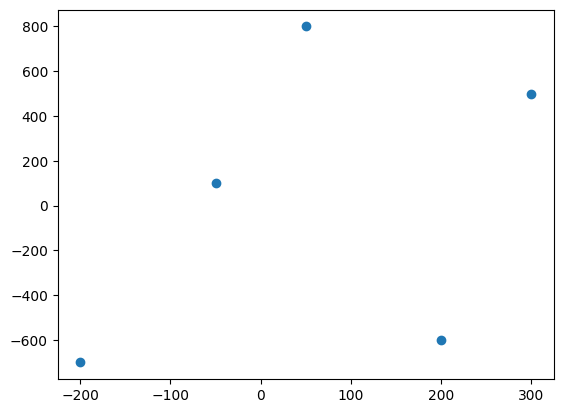

In [3]:
plt.scatter([-50, 300, -200, 200, 50], [100, 500, -700, -600, 800])

In [86]:
class answer_block:
    def __init__(self, position, errors, const_error):
        self.position = position
        self.errors = errors
        self.const_error = const_error
    def SHOW_INFO(self):
        
        print('Позиция приемника: ',self.position,'\n')
        print('Невязки   ', self.errors, '\nНорма невязок:', np.linalg.norm(self.errors, 2))
        print("Погрешность  ", self.const_error)

def get_position_n_info(Be, Ro, SHOW_INFO = True, SHOW_PLOT = True, SHOW_PATH = True):
    
    T = 0
    X = [np.random.randint(-max(Be[0]),max(Be[0])), np.random.randint(-max(Be[1]),max(Be[1]))]
    dX = copy.deepcopy(X)
    path = [[dX[0]], [dX[1]]]
    for epoche in range(50):
        for _ in range(100):
            Current_Ro = np.array([float((np.sqrt(np.square(Be[0][i] - dX[0]) + np.square(Be[1][i] - dX[1])))) for i in range(len(Ro))])
            DELTA_Ro = Ro - Current_Ro
            Be_directs =  np.array([[float(Be[0][i] - dX[0]) for i in range(len(Ro))],
                                    [float(Be[1][i] - dX[1]) for i in range(len(Ro))]])
            for i in range(len(Ro)):
                norm_div = np.sqrt(np.square(Be_directs[0][i]) + np.square(Be_directs[1][i]))
                Be_directs[0][i] /= norm_div
                Be_directs[1][i] /= norm_div
                Be_directs[0][i] *= DELTA_Ro[i]
                Be_directs[1][i] *= DELTA_Ro[i]
            Step = [np.mean(Be_directs[0]), np.mean(Be_directs[1])]
            dX[0] -= Step[0]
            dX[1] -= Step[1]
            path[0].append(dX[0])
            path[1].append(dX[1])
        nv = np.mean(DELTA_Ro)
        T += nv
        Ro = [Ro[i] - nv for i in range(len(Ro))]

    if SHOW_INFO:
        
        print('Позиция приемника: ',dX)
        print('Невязки   ', DELTA_Ro, '\nНорма невязок:', np.linalg.norm(DELTA_Ro, 2))
        print("Погрешность часов ",T,'\n')
        
    if SHOW_PLOT:
        if SHOW_PATH:
            plt.scatter(X[0], X[1], c='#ffd42e') 
            plt.plot(path[0], path[1], c='#edfad1')
            
        plt.scatter(Be[0], Be[1], c='b')         
        plt.scatter(dX[0], dX[1], c='#afd85f')
        
    return(answer_block(dX, DELTA_Ro, T))

Позиция приемника:  [20.835851697848156, -199.9423786473512]
Невязки    [ 1.7275677   0.19060644 -0.48465647  0.45433912 -1.8878568 ] 
Норма невязок: 2.6506867399793865
Погрешность   -10.97412972152626 



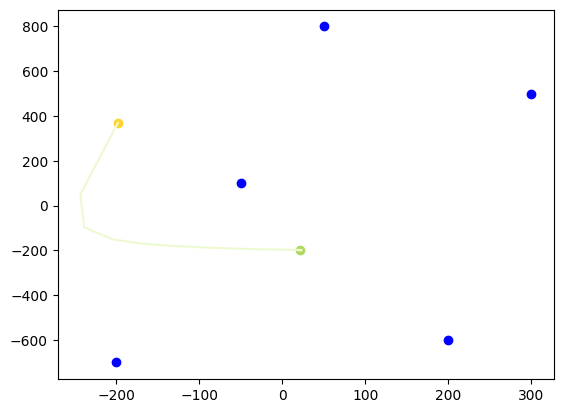

In [55]:
Beacons = np.array([
                   [-50,      300,    -200,       200,     50],
                   [100,      500,    -700,      -600,     800]])
Ro_dist = np.array([298.9468, 742.776, 535.1911, 427.8247, 987.5056])

True_pos = get_position_n_info(Beacons, Ro_dist).position

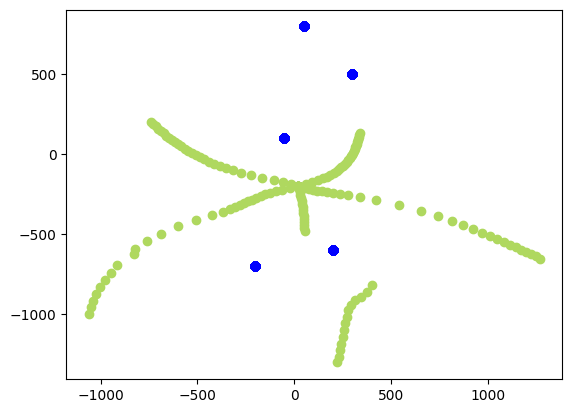

In [175]:
# рассмотрим ошибку следующего характероа
# один из маяков посылает значения вплоть до в 4 раза больших реальных
Beacons = np.array([
                   [-50,      300,    -200,       200,     50],
                   [100,      500,    -700,      -600,     800]])
Ro_dist = np.array([298.9468, 742.776, 535.1911, 427.8247, 987.5056])

plt.scatter(True_pos[0], True_pos[1], c='k') 
total_plot = [[],[],[],[],[]]
for koef in range(10, 40):        
    for i in range(5):
        X = get_position_n_info(Beacons, [koef/10 * Ro_dist[x] if x == i else Ro_dist[x] for x in range(5)], SHOW_INFO=0, SHOW_PATH=0).position
        total_plot[i].append(round(np.linalg.norm(np.array(True_pos) - np.array(X), 2)))
        

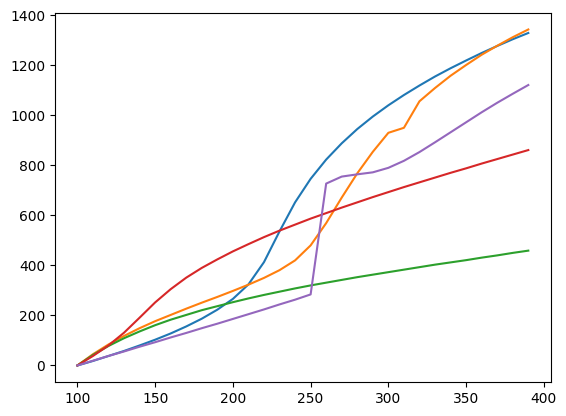

In [176]:
legend_x = np.array(range(len(total_plot[i])))
for i in range(len(legend_x)):
    legend_x[i] += 10
    legend_x[i] *=10
    
for i in range(5):
    plt.plot(legend_x, total_plot[i])

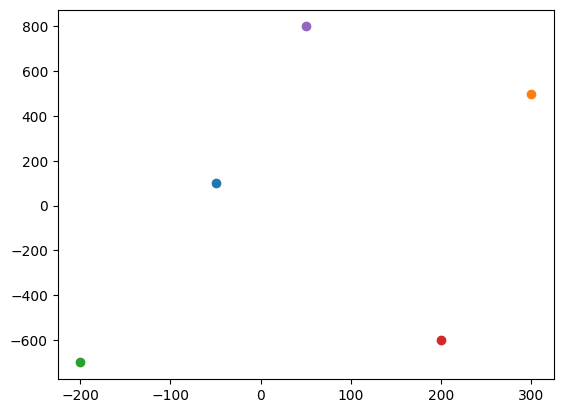

In [177]:
for i in range(5):
    plt.scatter(Beacons[0][i], Beacons[1][i])

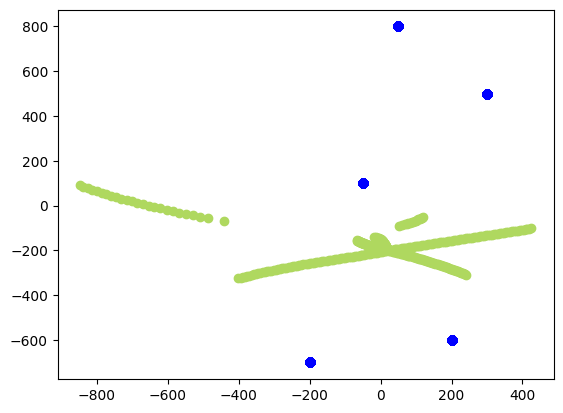

In [159]:
# рассмотрим ошибку следующего характероа
# один из маяков посылает значения вплоть до в 4 раза меньше реальных
Beacons = np.array([
                   [-50,      300,    -200,       200,     50],
                   [100,      500,    -700,      -600,     800]])
Ro_dist = np.array([298.9468, 742.776, 535.1911, 427.8247, 987.5056])

plt.scatter(True_pos[0], True_pos[1], c='k') 
total_plot = [[],[],[],[],[]]
for koef in range(100, 25, -1):        
    for i in range(5):
        X = get_position_n_info(Beacons, [koef/100 * Ro_dist[x] if x == i else Ro_dist[x] for x in range(5)], SHOW_INFO=0, SHOW_PATH=0).position
        total_plot[i].append(round(np.linalg.norm(np.array(True_pos) - np.array(X), 2)))
       

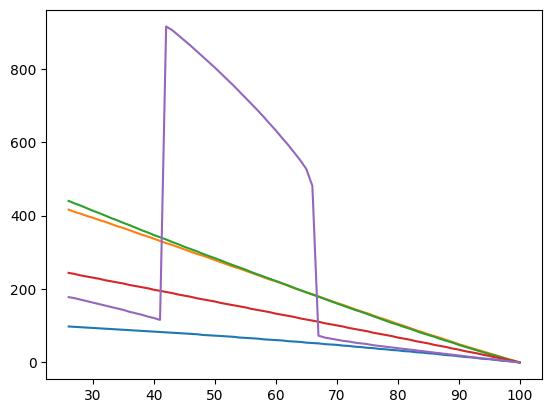

In [167]:
legend_x = np.array(range(len(total_plot[i])))
for i in range(len(legend_x)):
    legend_x[i] = 100 - legend_x[i]
    
    
for i in range(5):
    plt.plot(legend_x, total_plot[i])

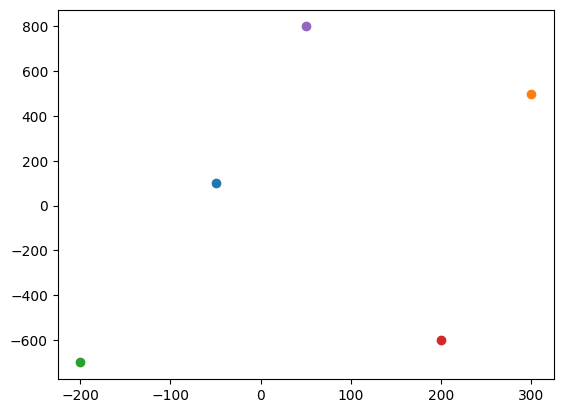

In [161]:
for i in range(5):
    plt.scatter(Beacons[0][i], Beacons[1][i])

потерян сигнал от маяков  0  ошибка составит 2  m
потерян сигнал от маяков  1  ошибка составит 0  m
потерян сигнал от маяков  2  ошибка составит 2  m
потерян сигнал от маяков  3  ошибка составит 2  m
потерян сигнал от маяков  4  ошибка составит 1  m


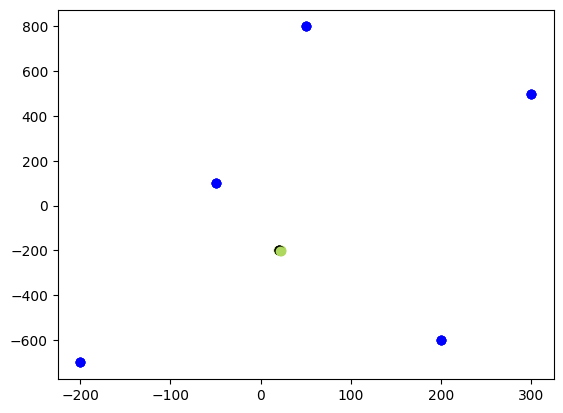

In [56]:
idx = []

for i in range(5):
 
    Beacons = np.array([
               [-50,      300,    -200,       200,     50],
               [100,      500,    -700,      -600,     800]])
    Ro_dist = np.array([298.9468, 742.776, 535.1911, 427.8247, 987.5056])

    idx = i
    Be_cut = [[],[]]
    Be_cut[0] = np.delete(Beacons[0], idx)
    Be_cut[1] = np.delete(Beacons[1],idx)
    Ro_dist = np.delete(Ro_dist, idx)
    
    plt.scatter(True_pos[0], True_pos[1], c='k') 
    
    X = get_position_n_info(Be_cut, Ro_dist, SHOW_INFO=0, SHOW_PATH=0).position
    print('потерян сигнал от маяка ', i, ' ошибка составит',round(np.linalg.norm(np.array(True_pos) - np.array(X), 2)),' m')
        

потерян сигнал от маяков  1   0 ошибка составит 2  m
потерян сигнал от маяков  2   0 ошибка составит 6  m
потерян сигнал от маяков  2   1 ошибка составит 13  m
потерян сигнал от маяков  3   0 ошибка составит 6  m
потерян сигнал от маяков  3   1 ошибка составит 237  m
потерян сигнал от маяков  3   2 ошибка составит 13  m
потерян сигнал от маяков  4   0 ошибка составит 1  m
потерян сигнал от маяков  4   1 ошибка составит 2  m
потерян сигнал от маяков  4   2 ошибка составит 3  m
потерян сигнал от маяков  4   3 ошибка составит 3  m


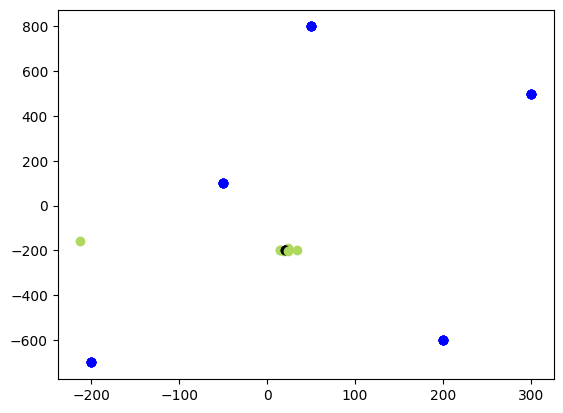

In [206]:


idx = []

for i in range(5):
    for j in range(i):
        Beacons = np.array([
                   [-50,      300,    -200,       200,     50],
                   [100,      500,    -700,      -600,     800]])
        Ro_dist = np.array([298.9468, 742.776, 535.1911, 427.8247, 987.5056])

        idx = [i, j]
        Be_cut = [[],[]]
        Be_cut[0] = np.delete(Beacons[0], idx)
        Be_cut[1] = np.delete(Beacons[1],idx)
        Ro_dist = np.delete(Ro_dist, idx)
        
        plt.scatter(True_pos[0], True_pos[1], c='k') 
        
        X = get_position_n_info(Be_cut, Ro_dist, SHOW_INFO=0, SHOW_PATH=0).position
        print('потерян сигнал от маяков ', i, ', ',j,'ошибка составит',round(np.linalg.norm(np.array(True_pos) - np.array(X), 2)),' m')
        

In [95]:
import pandas as pd
df = pd.read_excel('GNSS_1.xlsx')
Beacons = [[],[]]
Ro_dist = []

REC_PARAMS= None

for obj in df.values:
    if obj[0] == 'Beacon':
        Beacons[0].append(obj[1])
        Beacons[1].append(obj[2])
        Ro_dist.append(obj[3])
    if obj[0] == 'Receiver':
        REC_PARAMS = (obj[1], obj[2], obj[3])

for i in range(len(Ro_dist)):
    Ro_dist[i] += REC_PARAMS[2] + np.sqrt(np.square(Beacons[0][i] - REC_PARAMS[0]) + np.square(Beacons[1][i] - REC_PARAMS[1]))

Позиция приемника:  [-2.020825908913316, -0.7557299241296442]
Невязки    [ 0.66772234 -2.00270336  0.78683137 -0.85905459 -0.44350111  0.16053743
 -2.31723061  4.00739853] 
Норма невязок: 5.240707811513949
Погрешность часов  12.043680760865847 



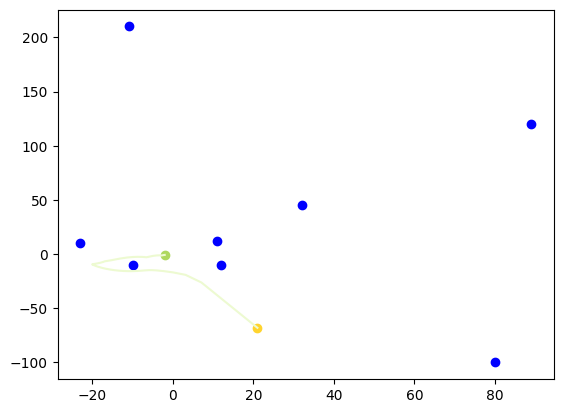

In [96]:
get_position_n_info(Beacons, Ro_dist)